### Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df  = pd.read_csv('/content/ME793_data.csv') # binary alloy data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
df.head()

,energy,energy_per_atom,volume,formation_energy_per_atom,unit_cell_formula,pretty_formula,elements,nelements,e_above_hull,band_gap,...,C33,C44,C55,C66,C12,C13,C23,homogeneous_poisson,poisson_ratio,universal_anisotropy
0,-18.107169,-3.621434,118.890829,-0.241179,"{'Ba': 1.0, 'Al': 4.0}",BaAl4,"['Ba', 'Al']",2,0.000000,0.0,...,108.0,36.0,36.0,37.0,27.0,31.0,31.0,0.22,0.22,0.06
1,-20.013340,-3.335557,155.720125,-0.198849,"{'Ba': 2.0, 'Al': 4.0}",BaAl2,"['Ba', 'Al']",2,0.044320,0.0,...,85.0,32.0,32.0,32.0,21.0,21.0,21.0,0.20,0.20,0.00
2,-43.588191,-7.264698,126.776938,-0.317706,"{'Zr': 4.0, 'Al': 2.0}",Zr2Al,"['Zr', 'Al']",2,0.054448,0.0,...,132.0,53.0,61.0,61.0,85.0,85.0,81.0,0.32,0.32,0.97
3,-43.464326,-5.433041,139.934873,-0.486934,"{'Zr': 2.0, 'Al': 6.0}",ZrAl3,"['Zr', 'Al']",2,0.000000,0.0,...,201.0,81.0,81.0,99.0,64.0,45.0,45.0,0.18,0.18,0.06
4,-61.878187,-6.187819,188.086769,-0.521393,"{'Zr': 4.0, 'Al': 6.0}",Zr2Al3,"['Zr', 'Al']",2,0.000000,0.0,...,202.0,71.0,77.0,51.0,52.0,48.0,72.0,0.24,0.24,0.16


In [ ]:
 df.isnull().values.any()

False

In [ ]:
properties = df.keys()

In [ ]:
print(properties)

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'unit_cell_formula', 'pretty_formula', 'elements', 'nelements',
       'e_above_hull', 'band_gap', 'density', 'total_magnetization',
       'material_id', 'crystal_system', 'G_Reuss', 'G_VRH', 'G_Voigt',
       'G_Voigt_Reuss_Hill', 'K_Reuss', 'K_VRH', 'K_Voigt',
       'K_Voigt_Reuss_Hill', 'elastic_anisotropy', 'C11', 'C22', 'C33', 'C44',
       'C55', 'C66', 'C12', 'C13', 'C23', 'homogeneous_poisson',
       'poisson_ratio', 'universal_anisotropy'],
      dtype='object')


### Types of crystal structures with percentage

In [ ]:
cry_struct = df['crystal_system'].value_counts()
print(type(cry_struct))
print(cry_struct)

<class 'pandas.core.series.Series'>
cubic           624
tetragonal      325
hexagonal       288
orthorhombic    167
trigonal         54
monoclinic       29
triclinic         1
Name: crystal_system, dtype: int64


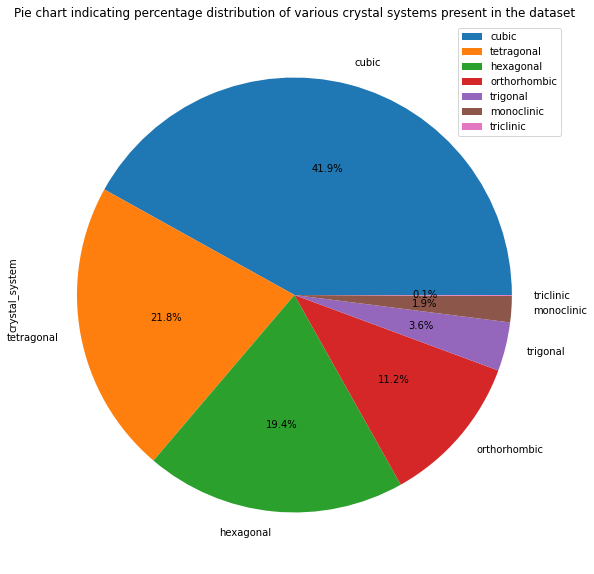

In [ ]:
#figure = figure(figsize = (8,8))
ax = cry_struct.plot(kind = "pie", figsize = (10,10), autopct='%1.1f%%')
ax.set_title("Pie chart indicating percentage distribution of various crystal systems present in the dataset")
ax.legend()

### Pair plots of Elastic constants with colour marking of crystal structures as above

In [ ]:
elastic_constants = df[['C11', 'C22', 'C33', 'C44', 'C55', 'C66', 'C12', 'C13', 'C23', 'crystal_system']]
elastic_constants.head()

,C11,C22,C33,C44,C55,C66,C12,C13,C23,crystal_system
0,87.0,87.0,108.0,36.0,36.0,37.0,27.0,31.0,31.0,tetragonal
1,85.0,85.0,85.0,32.0,32.0,32.0,21.0,21.0,21.0,cubic
2,135.0,132.0,132.0,53.0,61.0,61.0,85.0,85.0,81.0,tetragonal
3,209.0,209.0,201.0,81.0,81.0,99.0,64.0,45.0,45.0,tetragonal
4,225.0,201.0,202.0,71.0,77.0,51.0,52.0,48.0,72.0,orthorhombic


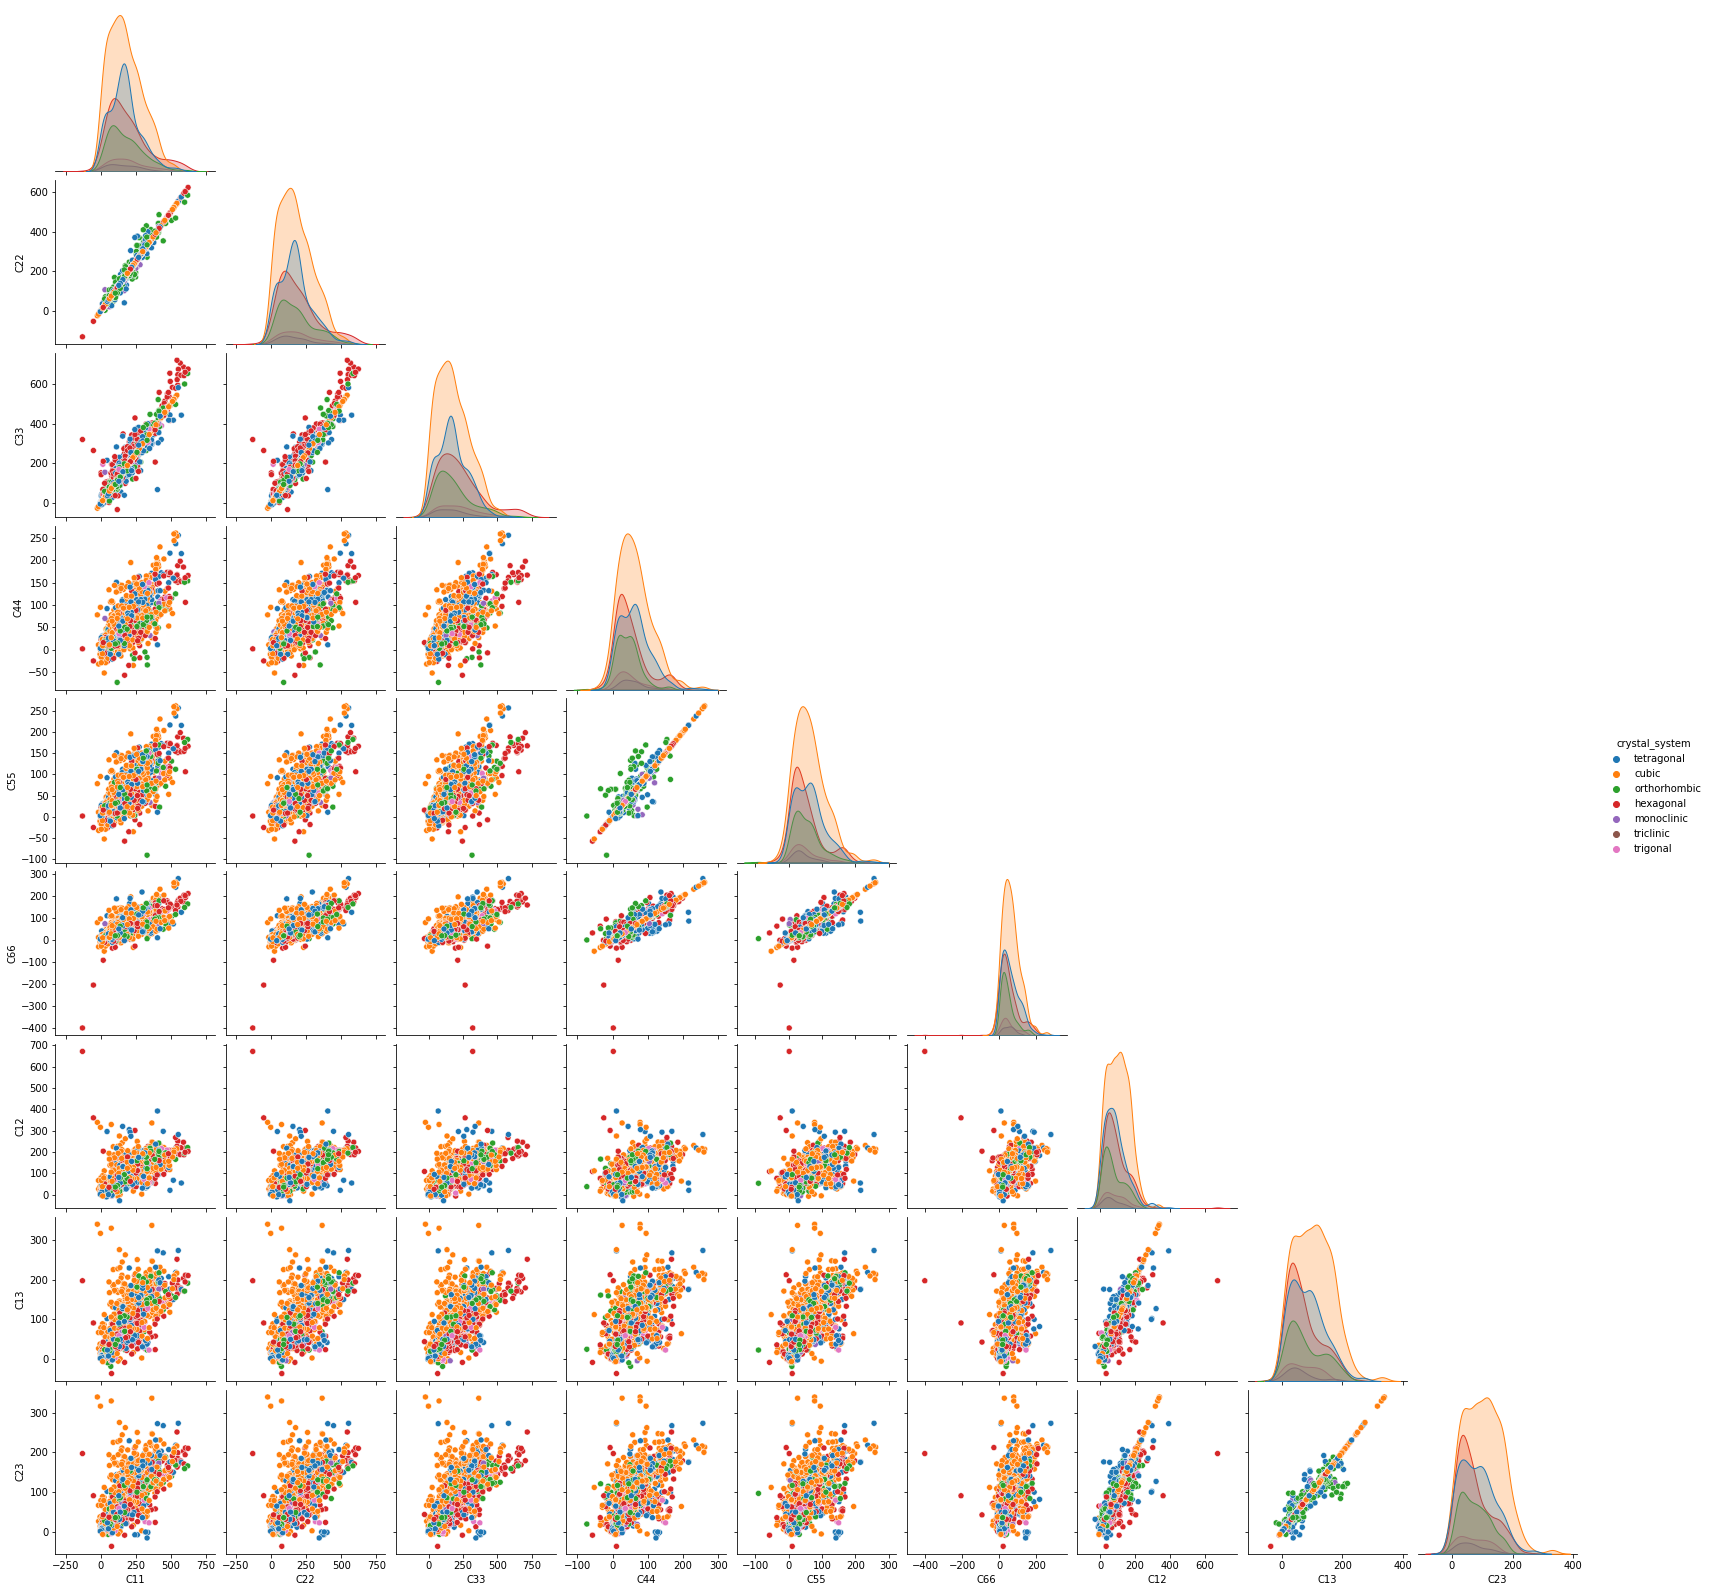

In [ ]:
sns.pairplot(elastic_constants, hue = 'crystal_system', corner=True)

In [ ]:
heat_data = df[[ 'energy', 'energy_per_atom', 'volume',
       'formation_energy_per_atom', 'e_above_hull', 'band_gap',
       'density', 'total_magnetization', 'crystal_system',
       'G_Reuss', 'G_VRH', 'G_Voigt', 'G_Voigt_Reuss_Hill', 'K_Reuss', 'K_VRH',
       'K_Voigt', 'K_Voigt_Reuss_Hill', 'elastic_anisotropy',
       'homogeneous_poisson', 'poisson_ratio', 'universal_anisotropy', 'C11',
       'C22', 'C33', 'C44', 'C55', 'C66', 'C12', 'C13', 'C23']]


### functions to add some extra useful columns in the data

In [ ]:
def crys_cubic(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'cubic'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_cubic'] = np.array(p)

def crys_ortho(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'orthorhombic'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_orthorhombic'] = np.array(p)

def crys_hexa(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'hexagonal'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_hexagonal'] = np.array(p)

def crys_tetra(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'tetragonal'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_tetragonal'] = np.array(p)

def crys_mono(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'monoclinic'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_monoclinic'] = np.array(p)

def crys_tri(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'trigonal'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_trigonal'] = np.array(p)

def crys_tric(data_set):
    p = []
    for i in range(len(data_set['crystal_system'])):
        if(data_set['crystal_system'][i] == 'triclinic'):
            p.append(1)
        else:
            p.append(0)
    data_set['is_triclinic'] = np.array(p)
            

In [ ]:
crys_cubic(heat_data)
crys_ortho(heat_data)
crys_hexa(heat_data)
crys_tetra(heat_data)
crys_mono(heat_data)
crys_tri(heat_data)
crys_tric(heat_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
heat_data.keys()

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'e_above_hull', 'band_gap', 'density', 'total_magnetization',
       'crystal_system', 'G_Reuss', 'G_VRH', 'G_Voigt', 'G_Voigt_Reuss_Hill',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'K_Voigt_Reuss_Hill',
       'elastic_anisotropy', 'homogeneous_poisson', 'poisson_ratio',
       'universal_anisotropy', 'C11', 'C22', 'C33', 'C44', 'C55', 'C66', 'C12',
       'C13', 'C23', 'is_cubic', 'is_orthorhombic', 'is_hexagonal',
       'is_tetragonal', 'is_monoclinic', 'is_trigonal', 'is_triclinic'],
      dtype='object')

In [ ]:
heat = heat_data.corr()
print(heat)

### Covariance Matrix

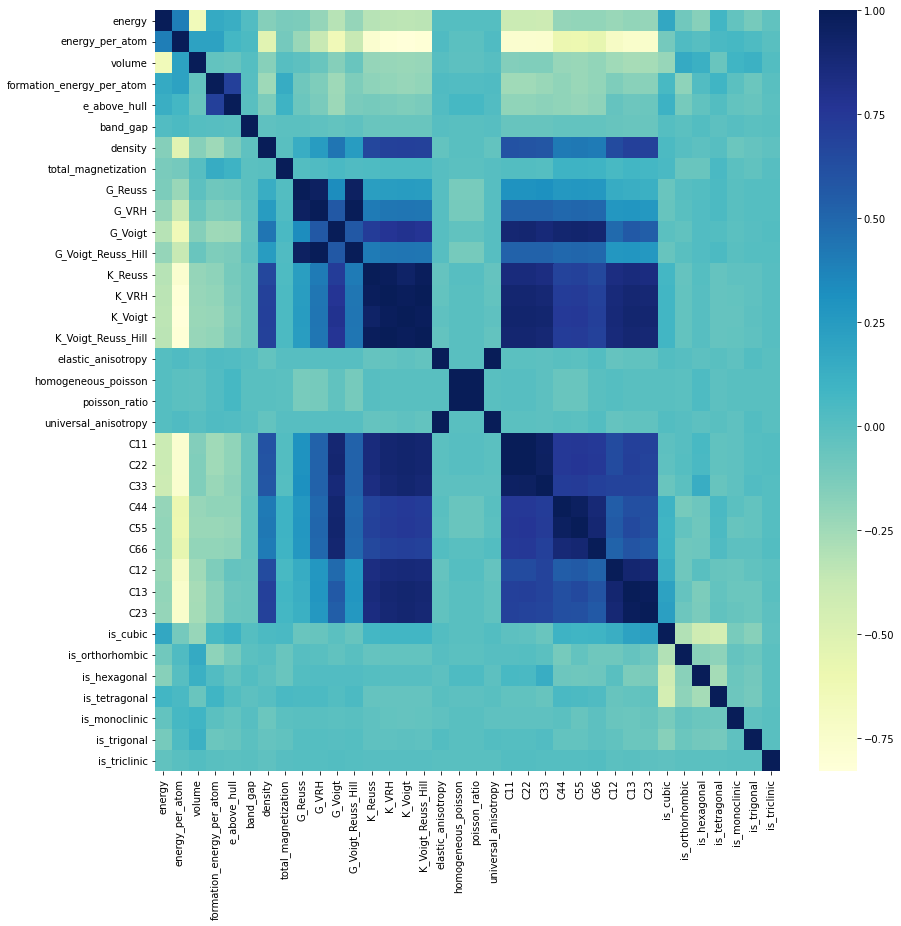

In [ ]:
plt.figure(figsize=(14, 14))
dataplot = sns.heatmap(heat, cmap="YlGnBu", annot=False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Training

In [ ]:
Prop_X = ['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'density', 'G_Reuss', 'G_VRH', 'G_Voigt', 'G_Voigt_Reuss_Hill',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'K_Voigt_Reuss_Hill',
       'elastic_anisotropy', 'is_cubic', 'is_orthorhombic', 'is_hexagonal',
       'is_tetragonal', 'is_monoclinic', 'is_trigonal', 'is_triclinic']


Prop_Y = ['C11', 'C22', 'C33', 'C44', 'C55', 'C66', 'C12', 'C13', 'C23']

X = heat_data[Prop_X]
y = heat_data[Prop_Y]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)

In [ ]:
random_forest = RandomForestRegressor()

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

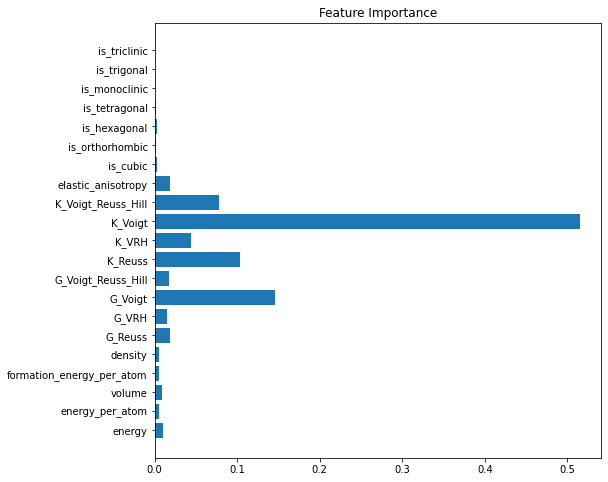

In [ ]:
plt.figure(figsize=(8,8))
plt.barh(X.keys(),  random_forest.feature_importances_)
plt.title('Feature Importance')

### Testing

In [ ]:
y_pred_rfr = random_forest.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred_rfr))
print('MSE: ', mean_squared_error(y_test, y_pred_rfr)) 
print('R2 score: ', r2_score(y_test, y_pred_rfr))

MAE:  14.254965277777778
MSE:  571.9722780257936
R2 score:  0.8953804985006598


In [ ]:
print(y_pred_rfr)
print(type(y_pred_rfr))

In [ ]:
print(y_test)
print(type(y_test))

In [ ]:
y_train_pred = random_forest.predict(X_train)

### Results Visualisation

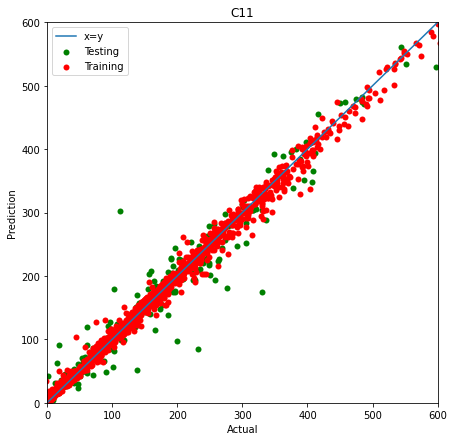

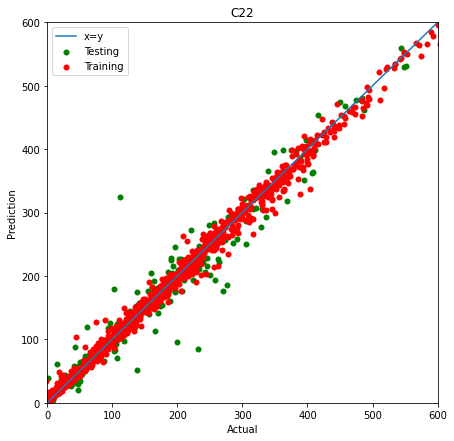

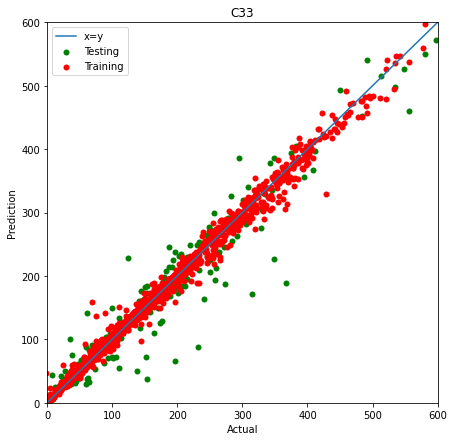

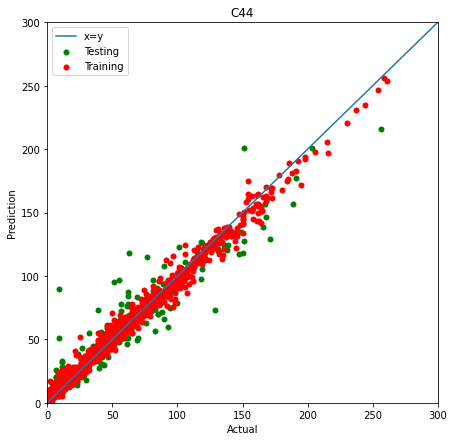

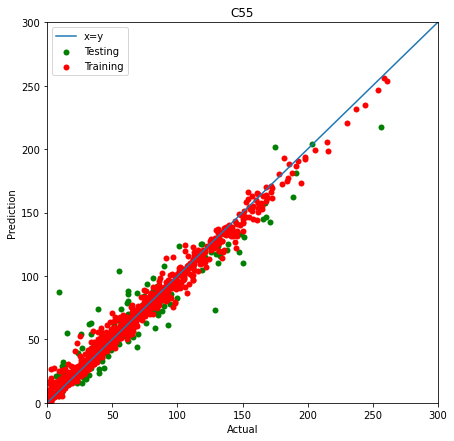

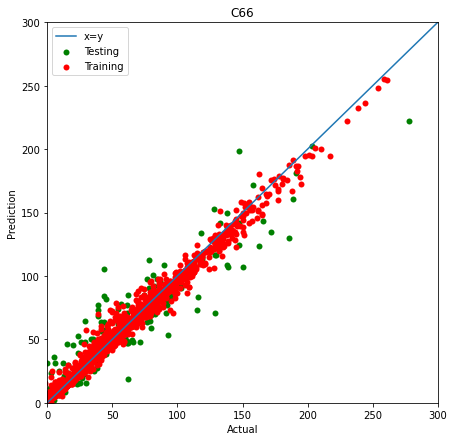

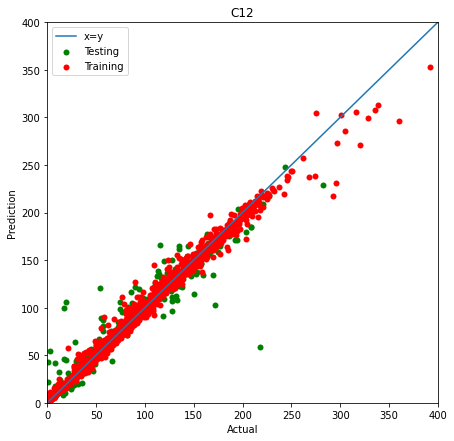

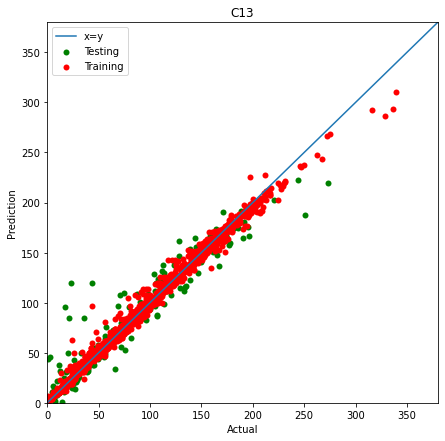

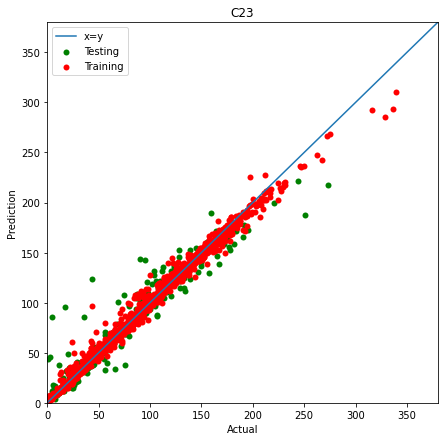

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test['C11'], y_pred_rfr[:,0], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C11'], y_train_pred[:,0], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,600)
plt.ylim(0,600)
plt.title('C11')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C22'], y_pred_rfr[:,1], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C22'], y_train_pred[:,1], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,600)
plt.ylim(0,600)
plt.title('C22')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C33'], y_pred_rfr[:,2], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C33'], y_train_pred[:,2], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,600)
plt.ylim(0,600)
plt.title('C33')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C44'], y_pred_rfr[:,3], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C44'], y_train_pred[:,3], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,300)
plt.ylim(0,300)
plt.title('C44')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C55'], y_pred_rfr[:,4], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C55'], y_train_pred[:,4], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,300)
plt.ylim(0,300)
plt.title('C55')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C66'], y_pred_rfr[:,5], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C66'], y_train_pred[:,5], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,300)
plt.ylim(0,300)
plt.title('C66')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C12'], y_pred_rfr[:,6], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C12'], y_train_pred[:,6], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('C12')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C13'], y_pred_rfr[:,7], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C13'], y_train_pred[:,7], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,380)
plt.ylim(0,380)
plt.title('C13')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test['C23'], y_pred_rfr[:,8], linewidths=0.0001, c=['green'])
plt.scatter(y_train['C23'], y_train_pred[:,8], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,380)
plt.ylim(0,380)
plt.title('C23')
plt.show()

In [ ]:
three_comp_test_data = pd.read_csv('/content/ME793_three_component_data.csv') # Three component alloy data

In [ ]:
three_comp_test_data.head()

,energy,energy_per_atom,volume,formation_energy_per_atom,unit_cell_formula,pretty_formula,elements,nelements,e_above_hull,band_gap,...,C33,C44,C55,C66,C12,C13,C23,homogeneous_poisson,poisson_ratio,universal_anisotropy
0,-56.369357,-4.697446,219.297872,-0.316801,"{'Ba': 1.0, 'Al': 9.0, 'Fe': 2.0}",BaAl9Fe2,"['Ba', 'Al', 'Fe']",3,0.000000,0.0,...,126.0,69.0,69.0,31.0,65.0,51.0,51.0,0.26,0.26,0.70
1,-51.522250,-4.293521,217.985996,-0.361121,"{'Ba': 1.0, 'Al': 9.0, 'Ni': 2.0}",BaAl9Ni2,"['Ba', 'Al', 'Ni']",3,0.004534,0.0,...,154.0,52.0,52.0,36.0,64.0,38.0,38.0,0.26,0.26,0.23
2,-35.674179,-3.243107,363.812653,-0.330805,"{'Ba': 5.0, 'Al': 5.0, 'Pb': 1.0}",Ba5Al5Pb,"['Ba', 'Al', 'Pb']",3,0.000000,0.0,...,55.0,16.0,16.0,20.0,11.0,20.0,20.0,0.25,0.25,0.09
3,-24.839717,-3.548531,254.771167,-0.515295,"{'Ba': 3.0, 'Al': 2.0, 'Sn': 2.0}",Ba3(AlSn)2,"['Ba', 'Al', 'Sn']",3,0.006500,0.0,...,72.0,15.0,27.0,16.0,19.0,15.0,16.0,0.24,0.24,0.33
4,-36.148251,-3.286205,360.950849,-0.348475,"{'Ba': 5.0, 'Al': 5.0, 'Sn': 1.0}",Ba5Al5Sn,"['Ba', 'Al', 'Sn']",3,0.000000,0.0,...,56.0,17.0,17.0,21.0,12.0,20.0,20.0,0.25,0.25,0.08


In [ ]:
len(three_comp_test_data)

1260

In [ ]:
elastic_constants_three_com = three_comp_test_data[['C11', 'C22', 'C33', 'C44', 'C55', 'C66', 'C12', 'C13', 'C23', 'crystal_system']]
elastic_constants_three_com.head()

,C11,C22,C33,C44,C55,C66,C12,C13,C23,crystal_system
0,127.0,127.0,126.0,69.0,69.0,31.0,65.0,51.0,51.0,hexagonal
1,136.0,136.0,154.0,52.0,52.0,36.0,64.0,38.0,38.0,hexagonal
2,51.0,51.0,55.0,16.0,16.0,20.0,11.0,20.0,20.0,hexagonal
3,52.0,57.0,72.0,15.0,27.0,16.0,19.0,15.0,16.0,orthorhombic
4,54.0,54.0,56.0,17.0,17.0,21.0,12.0,20.0,20.0,hexagonal


### Pair plots of Elastic constants

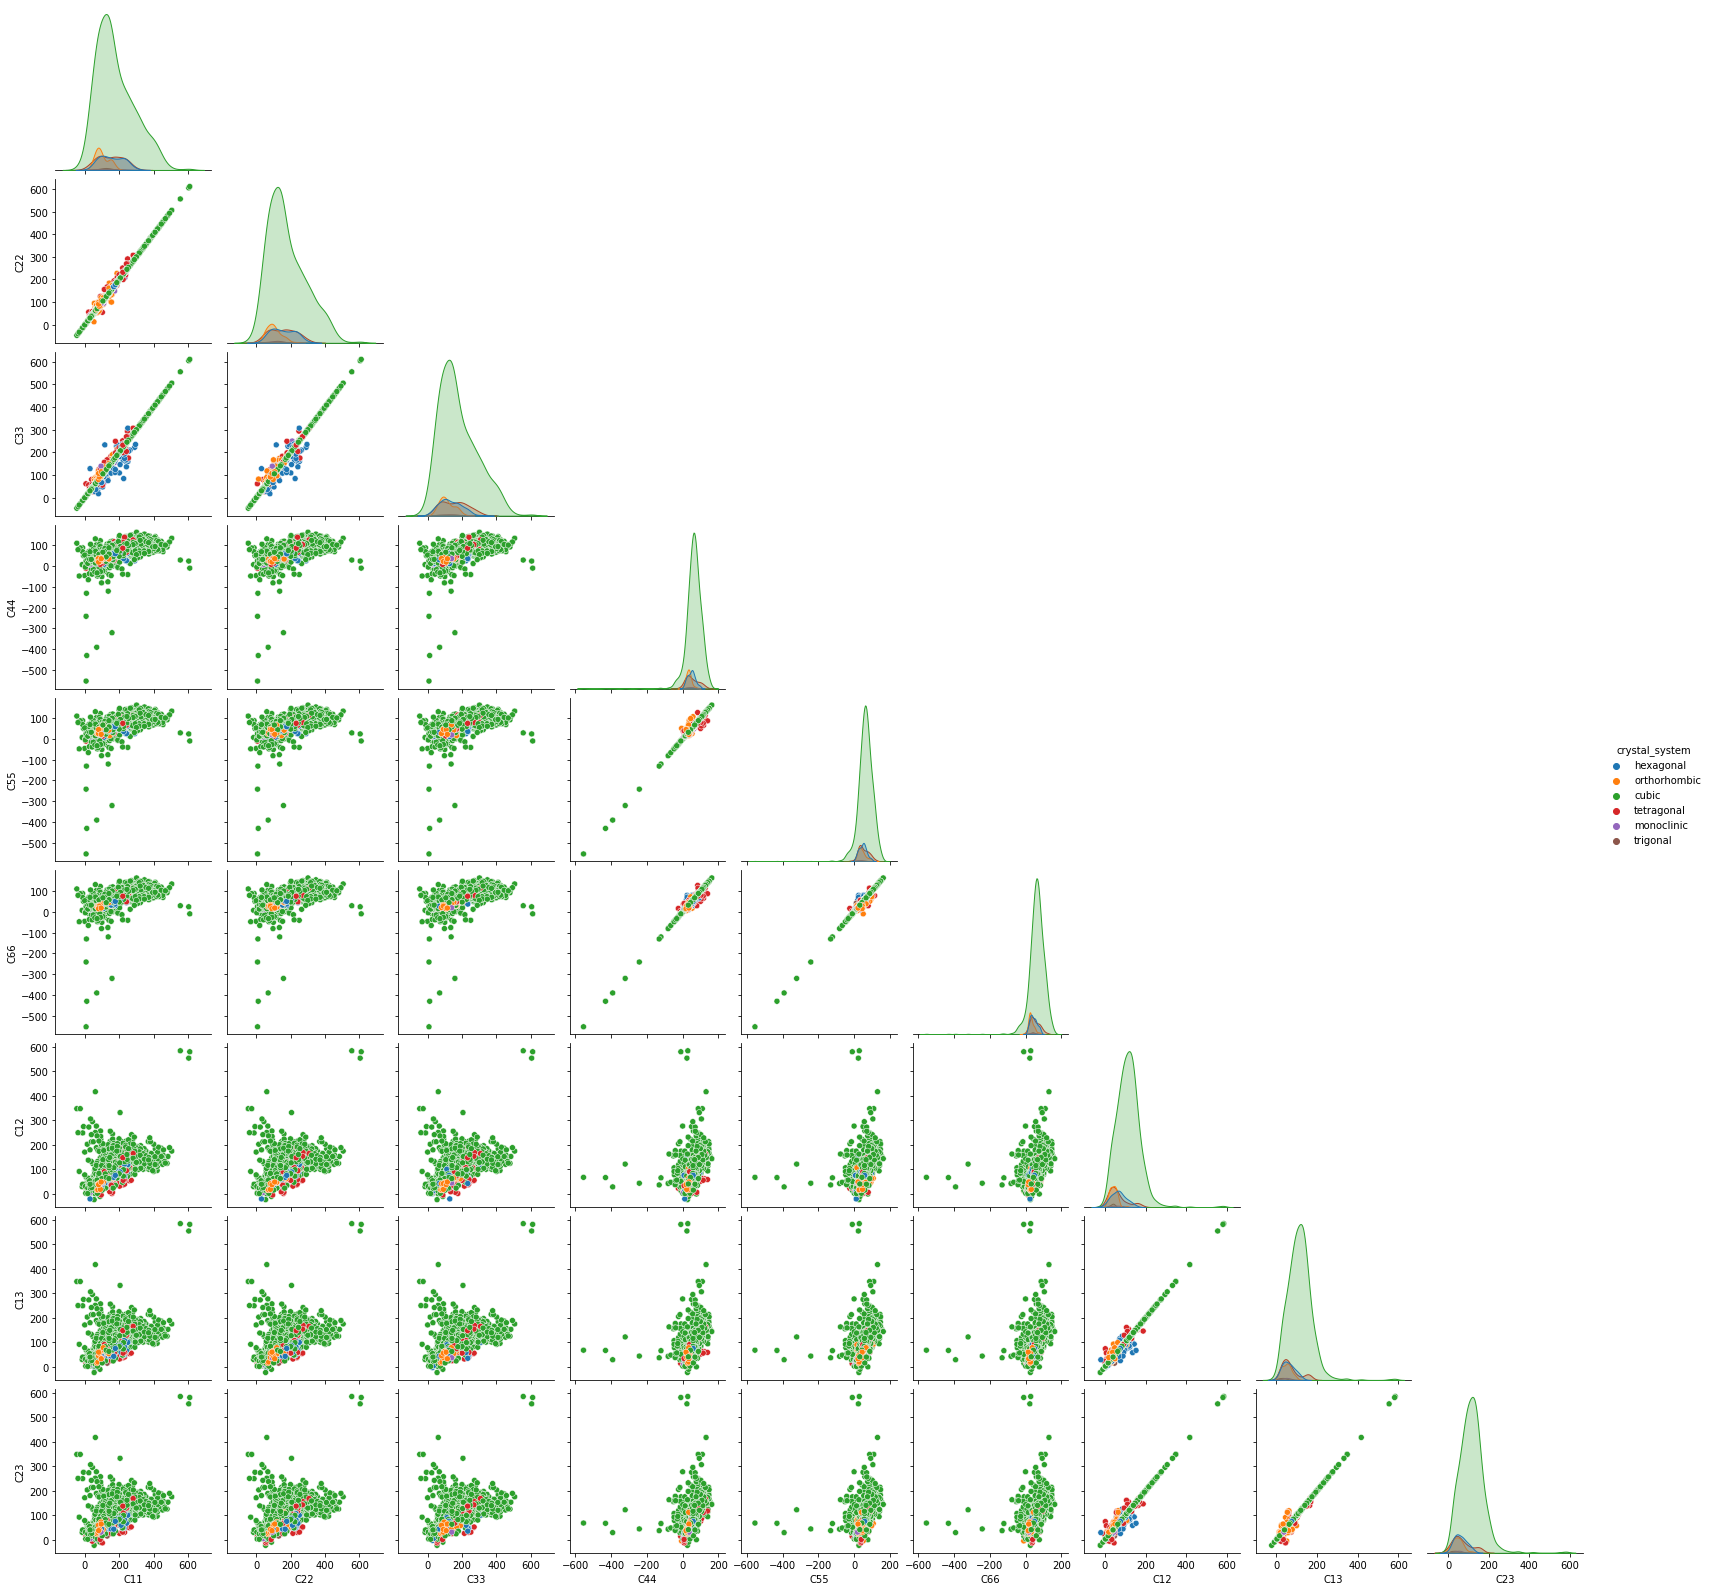

In [ ]:
sns.pairplot(elastic_constants_three_com, hue = 'crystal_system', corner=True)

### type of crystal structures

In [ ]:
cry_struct1 = three_comp_test_data['crystal_system'].value_counts()
print(type(cry_struct1))
print(cry_struct1)

<class 'pandas.core.series.Series'>
cubic           1028
tetragonal        88
hexagonal         78
orthorhombic      55
monoclinic         6
trigonal           5
Name: crystal_system, dtype: int64


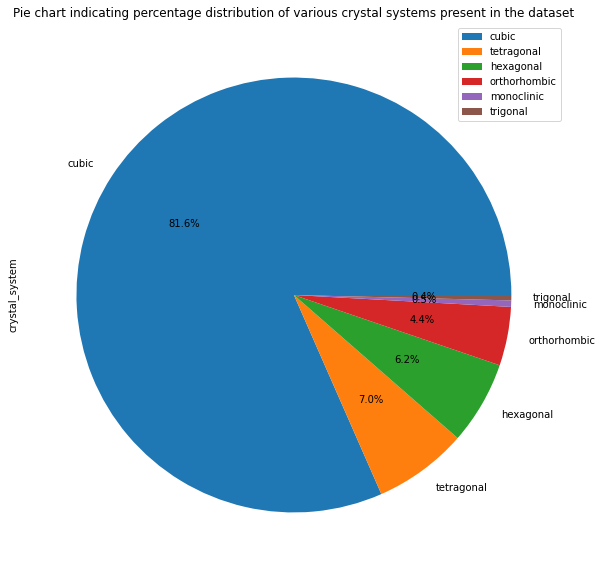

In [ ]:
#figure = figure(figsize = (8,8))
ax = cry_struct1.plot(kind = "pie", figsize = (10,10), autopct='%1.1f%%')
ax.set_title("Pie chart indicating percentage distribution of various crystal systems present in the dataset")
ax.legend()

In [ ]:
heat_data_three_com = three_comp_test_data[[ 'energy', 'energy_per_atom', 'volume',
       'formation_energy_per_atom', 'e_above_hull', 'band_gap',
       'density', 'total_magnetization', 'crystal_system',
       'G_Reuss', 'G_VRH', 'G_Voigt', 'G_Voigt_Reuss_Hill', 'K_Reuss', 'K_VRH',
       'K_Voigt', 'K_Voigt_Reuss_Hill', 'elastic_anisotropy',
       'homogeneous_poisson', 'poisson_ratio', 'universal_anisotropy', 'C11',
       'C22', 'C33', 'C44', 'C55', 'C66', 'C12', 'C13', 'C23']]

### Adding some extra columns to the data

In [ ]:
crys_cubic(heat_data_three_com)
crys_ortho(heat_data_three_com)
crys_hexa(heat_data_three_com)
crys_tetra(heat_data_three_com)
crys_mono(heat_data_three_com)
crys_tri(heat_data_three_com)
crys_tric(heat_data_three_com)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
heat_data_three_com.keys()

Index(['energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom',
       'e_above_hull', 'band_gap', 'density', 'total_magnetization',
       'crystal_system', 'G_Reuss', 'G_VRH', 'G_Voigt', 'G_Voigt_Reuss_Hill',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'K_Voigt_Reuss_Hill',
       'elastic_anisotropy', 'homogeneous_poisson', 'poisson_ratio',
       'universal_anisotropy', 'C11', 'C22', 'C33', 'C44', 'C55', 'C66', 'C12',
       'C13', 'C23', 'is_cubic', 'is_orthorhombic', 'is_hexagonal',
       'is_tetragonal', 'is_monoclinic', 'is_trigonal', 'is_triclinic'],
      dtype='object')

In [ ]:
heat_data_three_com.head()

,energy,energy_per_atom,volume,formation_energy_per_atom,e_above_hull,band_gap,density,total_magnetization,crystal_system,G_Reuss,...,C12,C13,C23,is_cubic,is_orthorhombic,is_hexagonal,is_tetragonal,is_monoclinic,is_trigonal,is_triclinic
0,-56.369357,-4.697446,219.297872,-0.316801,0.000000,0.0,3.724330,0.061837,hexagonal,42.0,...,65.0,51.0,51.0,0,0,1,0,0,0,0
1,-51.522250,-4.293521,217.985996,-0.361121,0.004534,0.0,3.790139,0.004453,hexagonal,45.0,...,64.0,38.0,38.0,0,0,1,0,0,0,0
2,-35.674179,-3.243107,363.812653,-0.330805,0.000000,0.0,4.695459,0.104348,hexagonal,17.0,...,11.0,20.0,20.0,0,0,1,0,0,0,0
3,-24.839717,-3.548531,254.771167,-0.515295,0.006500,0.0,4.584363,0.000024,orthorhombic,19.0,...,19.0,15.0,16.0,0,1,0,0,0,0,0
4,-36.148251,-3.286205,360.950849,-0.348475,0.000000,0.0,4.325593,0.029507,hexagonal,18.0,...,12.0,20.0,20.0,0,0,1,0,0,0,0


In [ ]:
three_comp_X = heat_data_three_com[Prop_X]
three_comp_y = heat_data_three_com[Prop_Y]

### Testing the model on new three component data

In [ ]:
y_pred_three_comp = random_forest.predict(three_comp_X)
print('MAE: ', mean_absolute_error(three_comp_y, y_pred_three_comp))
print('MSE: ', mean_squared_error(three_comp_y, y_pred_three_comp)) 
print('R2 score: ', r2_score(three_comp_y, y_pred_three_comp))

MAE:  14.10957319223987
MSE:  783.0171762081131
R2 score:  0.7948767260965764


### Result visualisation

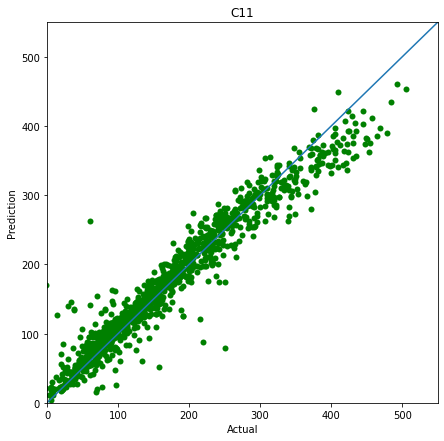

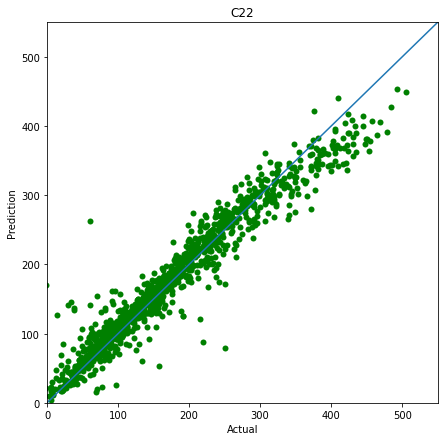

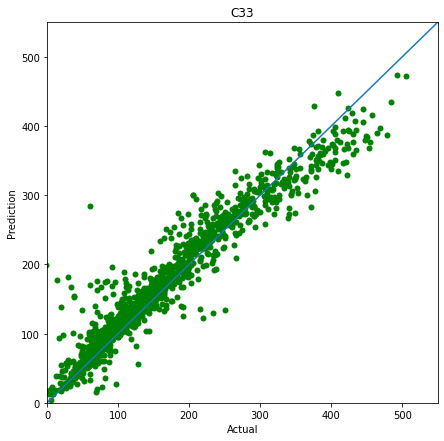

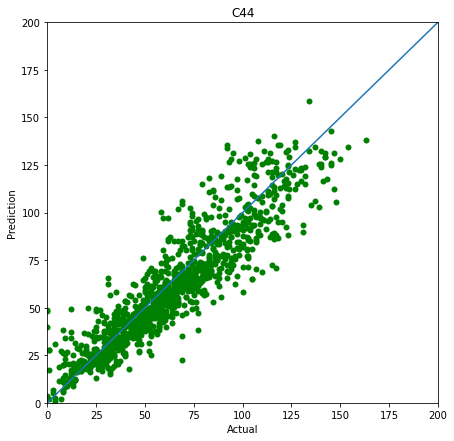

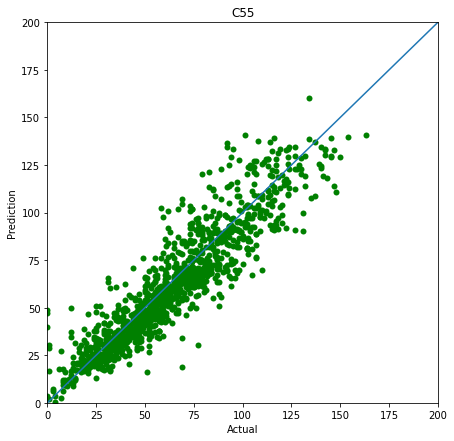

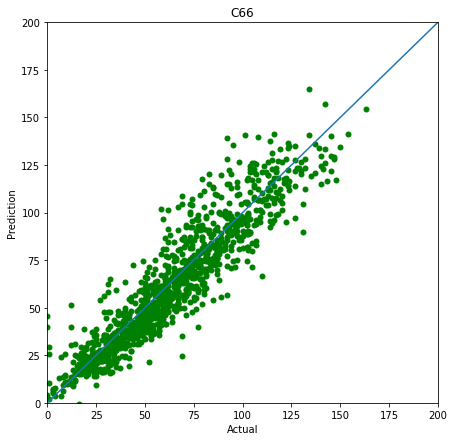

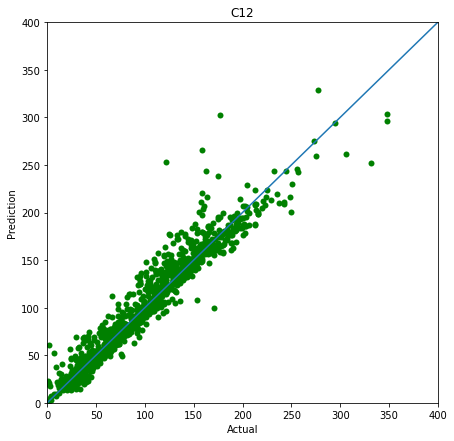

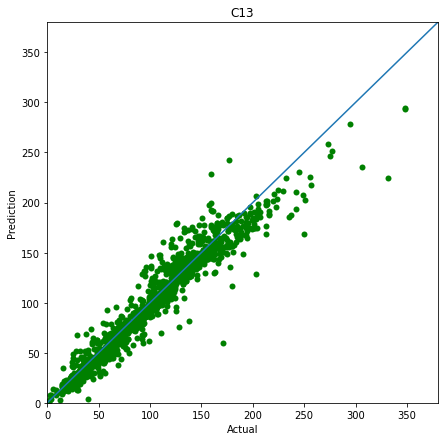

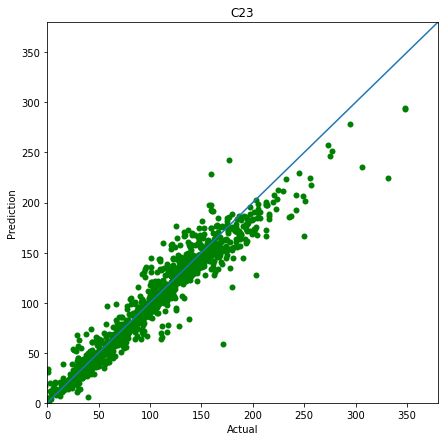

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C11'], y_pred_three_comp[:,0], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C11'], y_train_pred[:,0], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,550)
plt.ylim(0,550)
plt.title('C11')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C22'], y_pred_three_comp[:,1], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C22'], y_train_pred[:,1], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,550)
plt.ylim(0,550)
plt.title('C22')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C33'], y_pred_three_comp[:,2], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C33'], y_train_pred[:,2], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,550)
plt.ylim(0,550)
plt.title('C33')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C44'], y_pred_three_comp[:,3], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C44'], y_train_pred[:,3], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('C44')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C55'], y_pred_three_comp[:,4], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C55'], y_train_pred[:,4], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('C55')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C66'], y_pred_three_comp[:,5], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C66'], y_train_pred[:,5], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('C66')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C12'], y_pred_three_comp[:,6], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C12'], y_train_pred[:,6], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('C12')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C13'], y_pred_three_comp[:,7], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C13'], y_train_pred[:,7], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,380)
plt.ylim(0,380)
plt.title('C13')
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(three_comp_y['C23'], y_pred_three_comp[:,8], linewidths=0.0001, c=['green'])
#plt.scatter(y_train['C23'], y_train_pred[:,8], linewidths=0.0001, c=['red'])
plt.plot(np.linspace(-150,600), np.linspace(-150,600))
plt.xlabel('Actual')
plt.ylabel('Prediction')
#plt.legend(['x=y', 'Testing', 'Training' ])
plt.xlim(0,380)
plt.ylim(0,380)
plt.title('C23')
plt.show()